The price of a product is the most important attribute of marketing that product. One of those products where price matters a lot is a smartphone because it comes with a lot of features so that a company thinks a lot about how to price this mobile which can justify the features and also cover the marketing and manufacturing costs of the mobile.

Mobile phones are the best selling electronic devices as people keep updating their cell phones whenever they find new features in a new device. Thousands of mobiles are sold daily, in such a situation it is a very difficult task for someone who is planning to set up their own mobile phone business to decide what the price of the mobile should be.

In this task, we don’t have to predict the actual prices of the mobiles but we have to predict the price range of the mobiles.

So, since our task is to classify the price range of mobile phones and not to predict the actual prices, so here I am going to train a classification model to classify the price range of mobile phones as:

- 0 (low cost)
- 1 (medium cost)
- 2 (high cost)
- 4 (very high cost)

I will start the task of mobile price classification with machine learning by importing the necessary Python libraries and the dataset:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set()

data = pd.read_csv(r"C:\Users\SHREE\Downloads\Python CODES\Mobile Price Classification with Machine Learning\mobile_prices.csv")
print(data.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

Checking missing values

In [2]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

So the dataset contains 21 columns and luckily this dataset has no missing values, so we can just start by training the model, but before that let’s take a look at the correlation between the features in the dataset:

<AxesSubplot:>

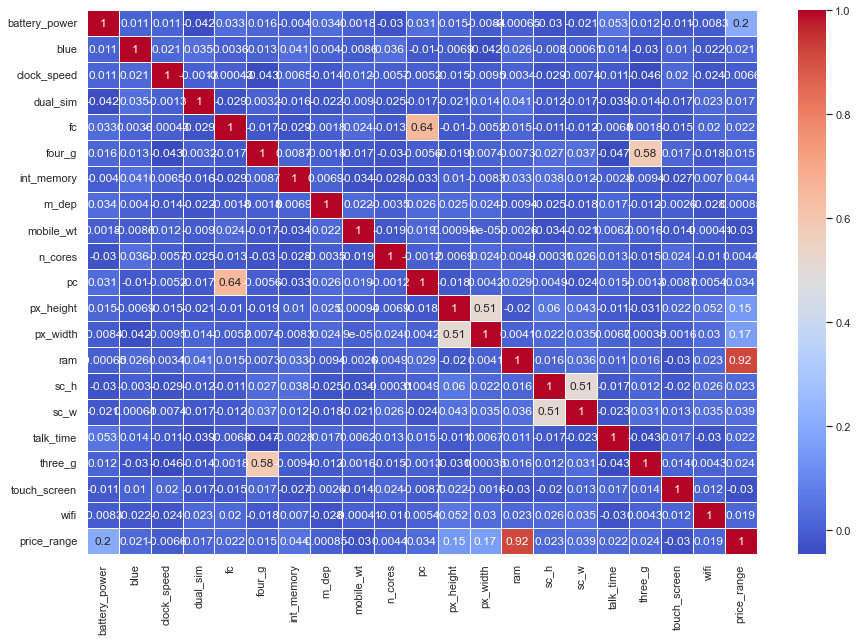

In [4]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

## Data Preparation

This dataset has no categorical features, so we can just use this data without any transformation because all the features of the dataset are numeric. But to train a model, it is very important to standardize or normalize the data and break it up into training and testing sets.

So let’s standardize the dataset and divide the data into 80% training and 20% testing:

In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## Mobile Price Classification Model

Now let’s train the mobile price classification model using Python. As this is a problem of classification, I will be using the Logistic Regression algorithm provided by Scikit-learn:

In [6]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

Now let’s have a look at the accuracy of the model:

In [7]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  95.5


So the model gives an accuracy of about 95.5% which is great. Now let’s have a look at the predictions made by the model:

In [8]:
print(y_pred)

[3 0 2 2 3 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 2 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0]


The above output shows the price range classified by the model. Let’s have a look at the number of mobile phones classified for each price range:

In [9]:
(unique, counts) = np.unique(y_pred, return_counts=True)
price_range = np.asarray((unique, counts)).T
print(price_range)

[[  0  95]
 [  1  90]
 [  2  97]
 [  3 118]]
